Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [5]:
data.shape

(4531, 35)

In [6]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [7]:
x_var = data.columns.tolist()

In [8]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [9]:
x = data[x_var]

In [10]:
y = data['Would_not_stay_in_the_neighborhood']

In [11]:
x = pd.get_dummies(x, drop_first = True)

In [12]:
# x = sm.add_constant(x)

In [13]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.305594
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.179      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2849.2936  
Date:                  2021-04-15 21:26                      BIC:                 3106.0415  
No. Observations:      4531                                  Log-Likelihood:      -1384.6    
Df Model:              39                                    LL-Null:             -1686.8    
Df Residuals:          4491                                  LLR p-value:         1.6819e-102
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [14]:
result.pvalues.sort_values(ascending=False)

GARBAGE COLLECTION_GOOD                         9.293256e-01
BCN_over_barri_evolution                        9.151620e-01
Barri_transport_GOOD                            8.463396e-01
Barri_evolution_IT IS THE SAME                  8.378724e-01
Owns_a_car                                      6.637586e-01
MUNICIPAL POLICE_GOOD                           6.414519e-01
CIRCULATION_GOOD                                5.755090e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.449863e-01
Monthly_family_income_< 1000 EUROS              4.786306e-01
Gender                                          4.349799e-01
BCN_over_barri_future                           3.224236e-01
PUBLIC LIGHTING_GOOD                            3.168967e-01
STREETS CLEANING_GOOD                           2.903554e-01
MUNICIPAL MARKETS_GOOD                          2.512089e-01
Monthly_family_income_2001-3000 EUROS           2.482588e-01
Barri_transport_NORMAL                          2.153328e-01
ASPHALT AND STREET CONSE

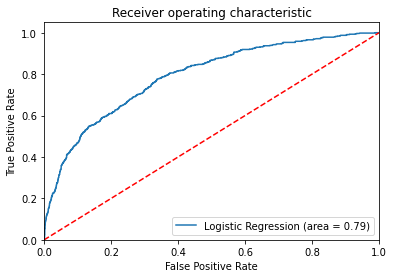

In [15]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [16]:
for i in ['GARBAGE COLLECTION', 'BCN_over_barri_evolution', 'Barri_transport', 'Barri_evolution', 'Owns_a_car']:
    x_var.remove(i)

In [17]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [18]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306124
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.178      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2840.0943  
Date:                  2021-04-15 21:26                      BIC:                 3051.9114  
No. Observations:      4531                                  Log-Likelihood:      -1387.0    
Df Model:              32                                    LL-Null:             -1686.8    
Df Residuals:          4498                                  LLR p-value:         7.1866e-106
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [19]:
result.pvalues.sort_values(ascending=False)

CIRCULATION_GOOD                                6.166958e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.537762e-01
MUNICIPAL POLICE_GOOD                           5.534458e-01
Gender                                          5.248419e-01
Monthly_family_income_< 1000 EUROS              4.146879e-01
BCN_over_barri_future                           3.501832e-01
STREETS CLEANING_GOOD                           3.021299e-01
MUNICIPAL MARKETS_GOOD                          2.870879e-01
PUBLIC LIGHTING_GOOD                            2.774155e-01
Monthly_family_income_2001-3000 EUROS           2.441590e-01
ASPHALT AND STREET CONSERVATION_GOOD            1.806988e-01
House_size_51-100 M2                            1.789817e-01
Living_alone                                    1.446895e-01
Monthly_family_income_> 3000 EUROS              1.427137e-01
House_size_< 50 M2                              1.390550e-01
House_size_> 150 M2                             1.224834e-01
GREEN AREAS_GOOD        

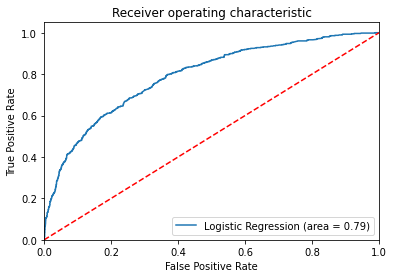

In [20]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [21]:
for i in ['FACADES AND BUILDING CONSERVATION', 'MUNICIPAL POLICE', 'CIRCULATION', 'Gender']:
    x_var.remove(i)

In [22]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [23]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306261
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.177      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2833.3386  
Date:                  2021-04-15 21:26                      BIC:                 3019.4809  
No. Observations:      4531                                  Log-Likelihood:      -1387.7    
Df Model:              28                                    LL-Null:             -1686.8    
Df Residuals:          4502                                  LLR p-value:         3.0238e-108
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [24]:
result.pvalues.sort_values(ascending=False)

Monthly_family_income_< 1000 EUROS              4.373059e-01
BCN_over_barri_future                           3.687793e-01
MUNICIPAL MARKETS_GOOD                          2.845520e-01
STREETS CLEANING_GOOD                           2.820591e-01
Monthly_family_income_2001-3000 EUROS           2.638510e-01
PUBLIC LIGHTING_GOOD                            2.563611e-01
House_size_51-100 M2                            1.832458e-01
ASPHALT AND STREET CONSERVATION_GOOD            1.749885e-01
Monthly_family_income_> 3000 EUROS              1.586795e-01
House_size_< 50 M2                              1.518652e-01
House_size_> 150 M2                             1.151963e-01
GREEN AREAS_GOOD                                1.123298e-01
Living_alone                                    1.093604e-01
BUS_GOOD                                        9.289572e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    6.167851e-02
BCN_over_barri_satisfaction_of_living           4.263587e-02
Barri_future_IT WILL IMP

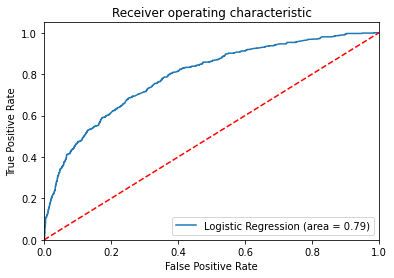

In [25]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [26]:
for i in ['BCN_over_barri_future', 'MUNICIPAL MARKETS', 'STREETS CLEANING', 'Monthly_family_income', 'PUBLIC LIGHTING']:
    x_var.remove(i)

In [27]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [28]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307201
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.175      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2827.8556  
Date:                  2021-04-15 21:26                      BIC:                 2969.0670  
No. Observations:      4531                                  Log-Likelihood:      -1391.9    
Df Model:              21                                    LL-Null:             -1686.8    
Df Residuals:          4509                                  LLR p-value:         2.1876e-111
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [29]:
result.pvalues.sort_values(ascending=False)

House_size_51-100 M2                            2.924579e-01
Living_alone                                    2.874739e-01
House_size_< 50 M2                              2.557090e-01
ASPHALT AND STREET CONSERVATION_GOOD            2.528628e-01
BUS_GOOD                                        9.518769e-02
House_size_> 150 M2                             8.673218e-02
GREEN AREAS_GOOD                                5.779307e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    5.082005e-02
BCN_over_barri_satisfaction_of_living           3.316672e-02
Social_class_MIDDLE-MIDDLE                      1.571353e-02
Social_class_MIDDLE-HIGH                        1.506337e-02
Time_living_in_barri_MORE THAN 10 YEARS         1.147237e-02
BCN_over_barri_transport                        1.123741e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       1.098532e-02
Social_class_MIDDLE-LOW                         1.056081e-02
Social_class_LOW                                8.365345e-03
Barri_future_IT WILL STA

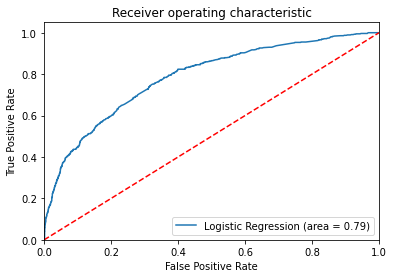

In [30]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [31]:
for i in ['House_size', 'Living_alone', 'ASPHALT AND STREET CONSERVATION']:
    x_var.remove(i)

In [32]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [33]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307867
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.173      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2823.8898  
Date:                  2021-04-15 21:26                      BIC:                 2933.0076  
No. Observations:      4531                                  Log-Likelihood:      -1394.9    
Df Model:              16                                    LL-Null:             -1686.8    
Df Residuals:          4514                                  LLR p-value:         6.2087e-114
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [34]:
result.pvalues.sort_values(ascending=False)

BUS_GOOD                                        1.283854e-01
GREEN AREAS_GOOD                                9.298168e-02
Social_class_MIDDLE-MIDDLE                      6.374127e-02
Social_class_MIDDLE-HIGH                        5.396609e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    4.254300e-02
Social_class_MIDDLE-LOW                         4.029244e-02
Social_class_LOW                                3.641516e-02
BCN_over_barri_satisfaction_of_living           2.782324e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       1.337473e-02
BCN_over_barri_transport                        9.966625e-03
Time_living_in_barri_MORE THAN 10 YEARS         9.799170e-03
Barri_future_IT WILL STAY THE SAME              9.011909e-03
Barri_future_IT WILL IMPROVE                    1.714337e-03
Barri_satisfaction_of_living_SATISFIED          1.511147e-04
Barri_comparison_ONE OF THE WORST               3.840501e-07
Time_living_in_barri_LESS THAN 10 YEARS         2.382173e-08
Barri_comparison_ONE OF 

In [35]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
BCN_over_barri_satisfaction_of_living            0.0457      0.021      2.204      0.028       0.005       0.086
BCN_over_barri_transport                         0.0331      0.013      2.580      0.010       0.008       0.058
Time_living_in_barri_LESS THAN 10 YEARS          0.1176      0.021      5.602      0.000       0.076       0.159
Time_living_in_barri_MORE THAN 10 YEARS          0.0388      0.015      2.583      0.010       0.009       0.068
Barri_future_IT WILL IMPROVE                    -0.0366      0.012     -3.141      0.002      -0.059      

In [36]:
result.pred_table()

array([[3923.,   52.],
       [ 471.,   85.]])

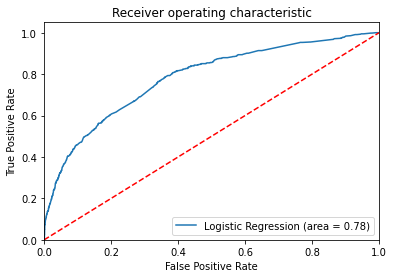

In [37]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()